## Visualizing linear relationships


https://seaborn.pydata.org/tutorial/regression.html

* [회귀 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### Functions to draw linear regression models

In [2]:
tips = sns.load_dataset("tips")

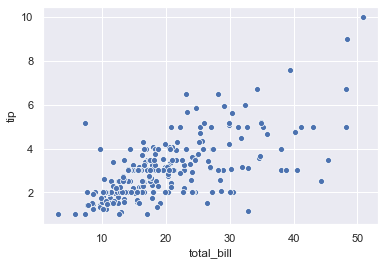

In [3]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

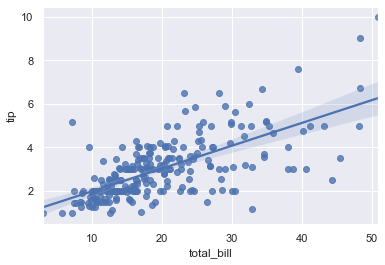

In [4]:
sns.regplot(data=tips, x="total_bill", y="tip")

In [5]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [6]:
tips.groupby(["smoker"]).corr()

total_bill       tip      size
smoker                                           
Yes    total_bill    1.000000  0.488218  0.527890
       tip           0.488218  1.000000  0.332227
       size          0.527890  0.332227  1.000000
No     total_bill    1.000000  0.822183  0.688068
       tip           0.822183  1.000000  0.580107
       size          0.688068  0.580107  1.000000

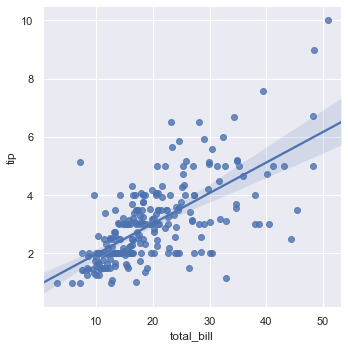

In [7]:
sns.lmplot(data=tips, x="total_bill", y="tip", truncate=False)

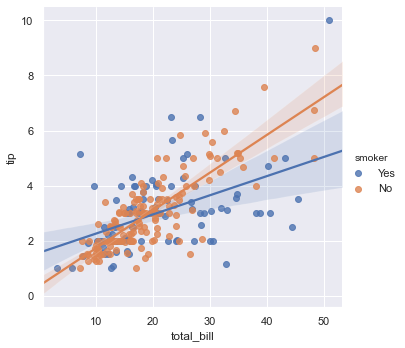

In [8]:
sns.lmplot(data=tips, x="total_bill", y="tip", truncate=False, hue="smoker")

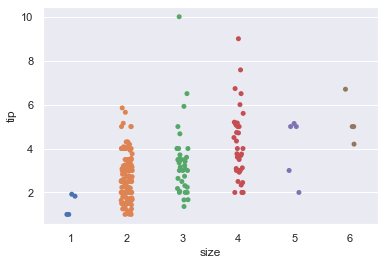

In [9]:
sns.stripplot(x="size", y="tip", data=tips)

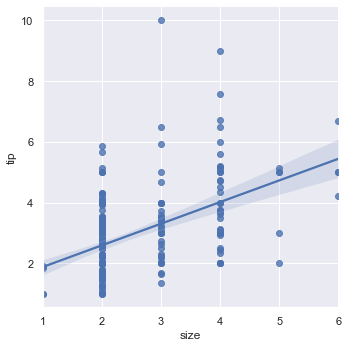

In [10]:
sns.lmplot(x="size", y="tip", data=tips)

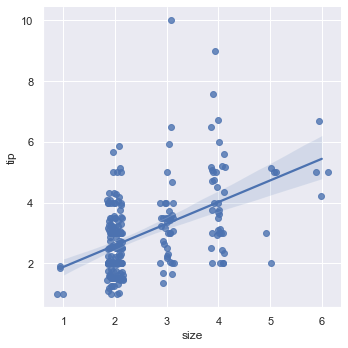

In [11]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.15)

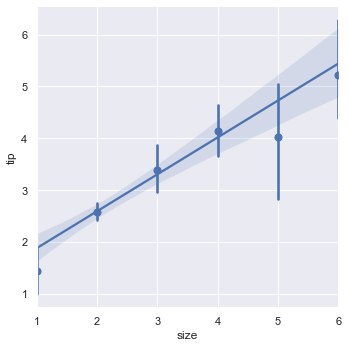

In [12]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

### Fitting different kinds of models

In [13]:
anscombe = sns.load_dataset("anscombe")

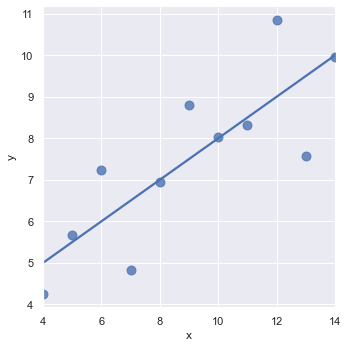

In [14]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80})

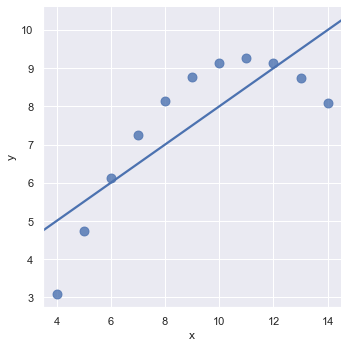

In [15]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80}, truncate=False)

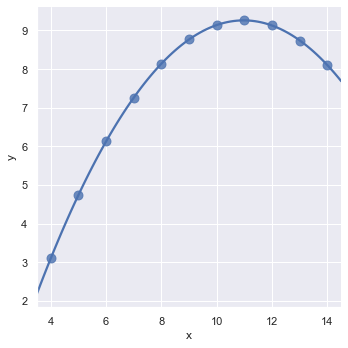

In [16]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, order=2, scatter_kws={"s": 80}, truncate=False)

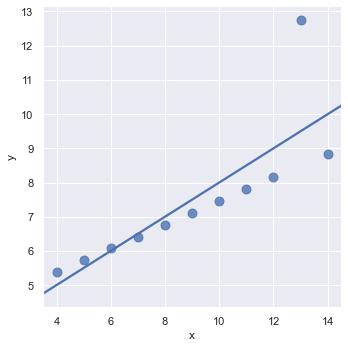

In [17]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80}, truncate=False)

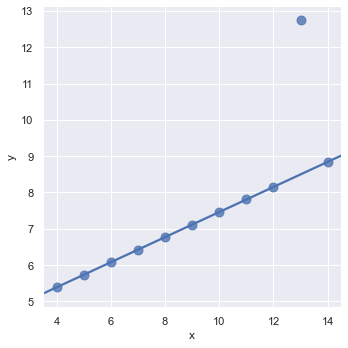

In [18]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80}, truncate=False, robust=True)

In [19]:
True == 1

True

In [20]:
False == 0

True

In [21]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15

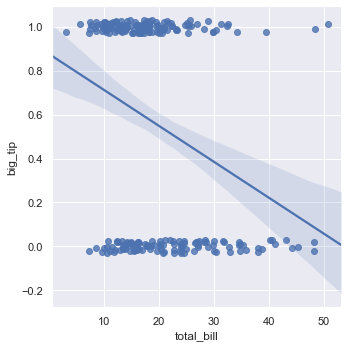

In [22]:
sns.lmplot(x="total_bill", y="big_tip", data=tips, truncate=False,
           y_jitter=.03)

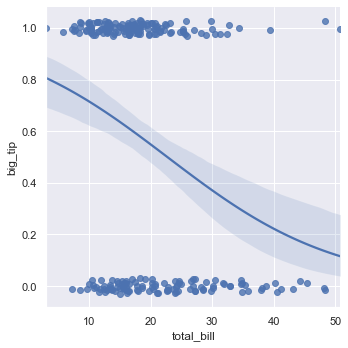

In [23]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03)

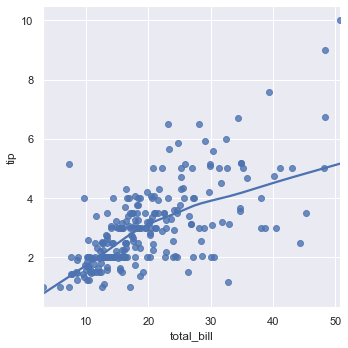

In [24]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

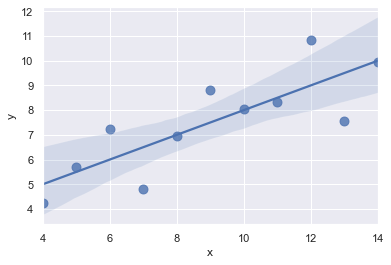

In [25]:
sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80})

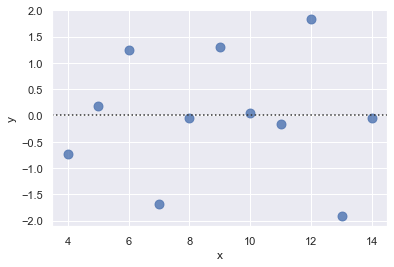

In [26]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80})

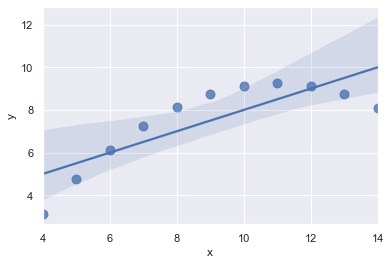

In [27]:
sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80})

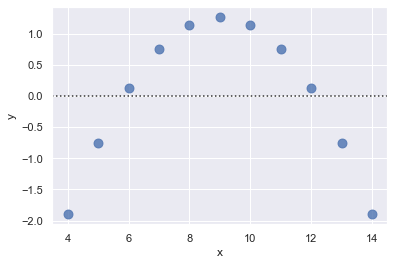

In [28]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80})

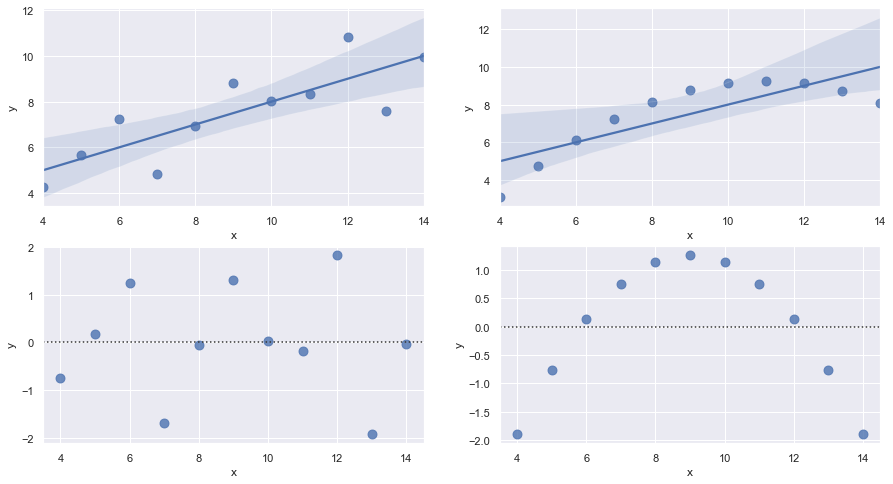

In [29]:
# 위의 그래프를 서브플롯에 모아 그리기
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80}, ax=axes[0, 0])
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80}, ax=axes[1, 0])
sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80}, ax=axes[0, 1])
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80}, ax=axes[1, 1])

### Conditioning on other variables

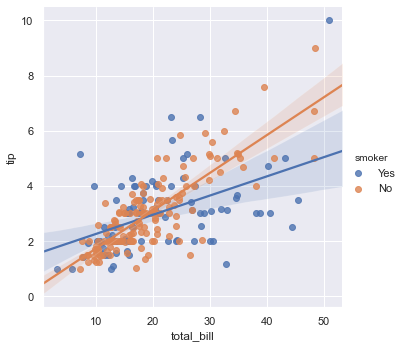

In [30]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, truncate=False)

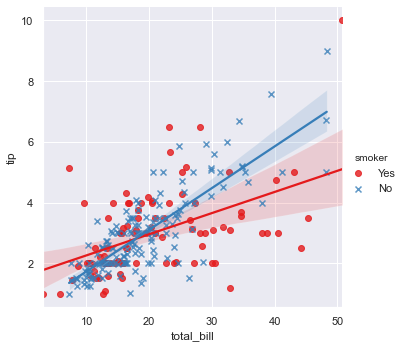

In [31]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")

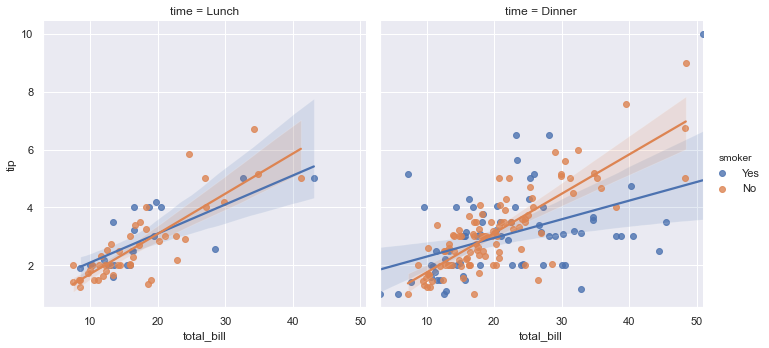

In [32]:
sns.lmplot(x="total_bill", y="tip", 
           hue="smoker", col="time", data=tips)

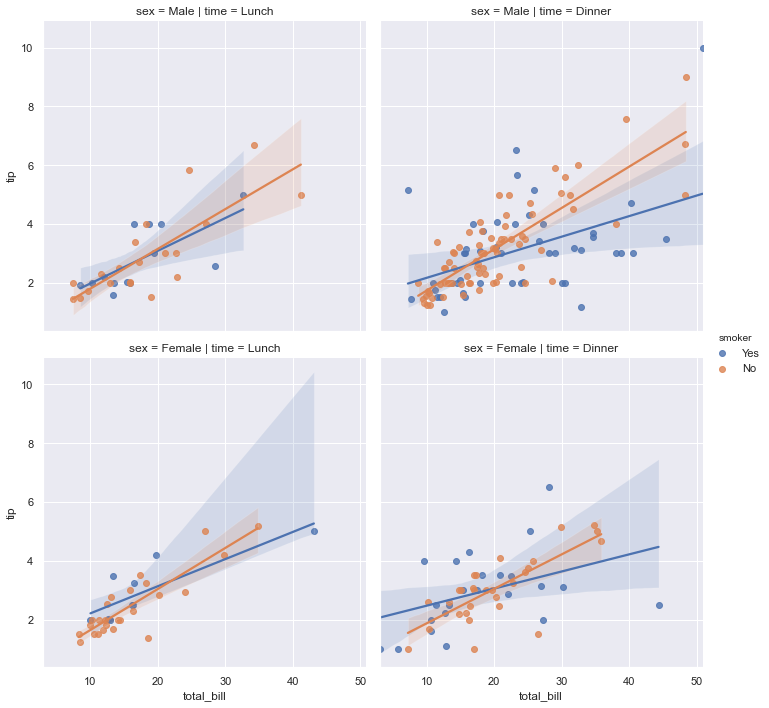

In [33]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips)

### Controlling the size and shape of the plot

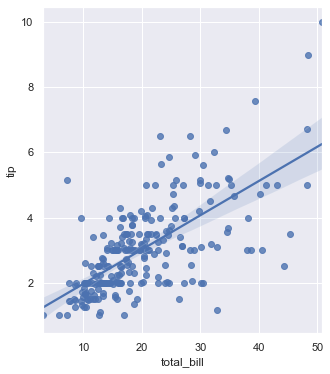

In [34]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax)

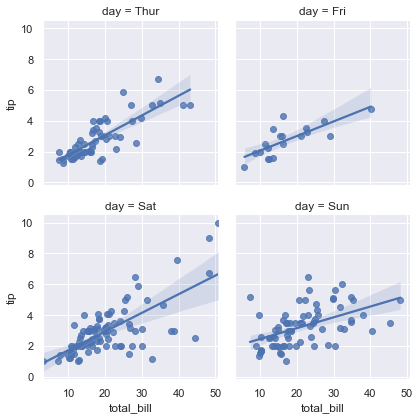

In [35]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3)

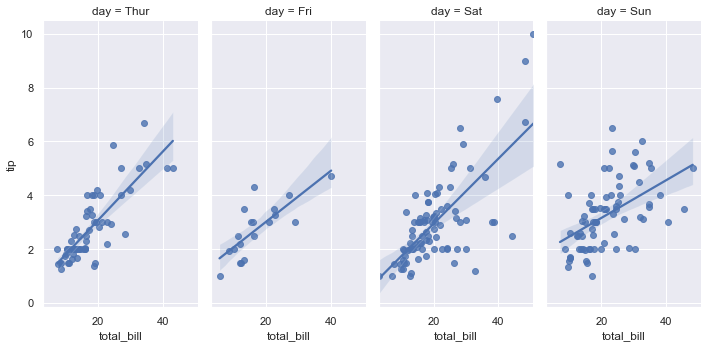

In [36]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5)

### Plotting a regression in other contexts

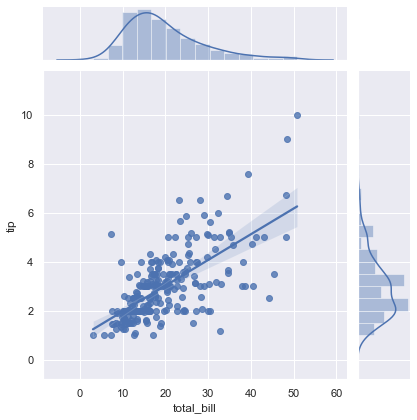

In [37]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

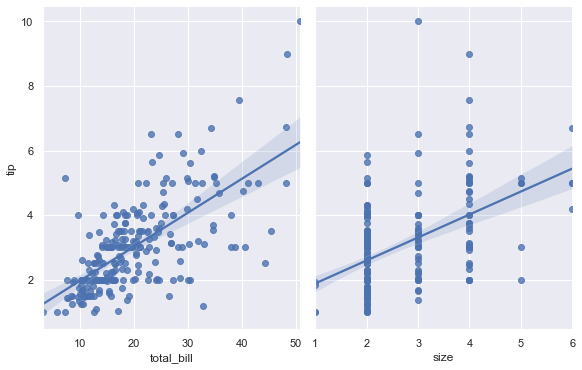

In [38]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg")

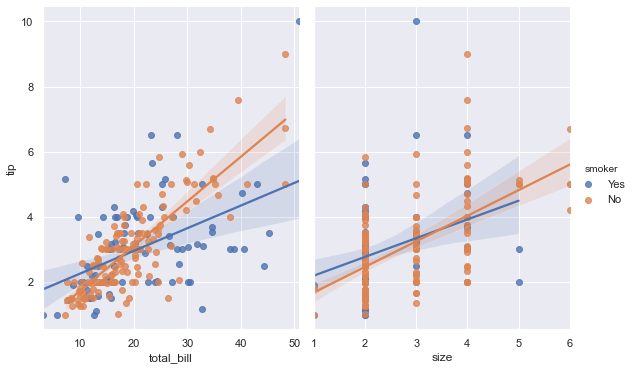

In [39]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg")